In [1]:
from benchmark.benchmark_simu import build_random_circuit, BenchmarkSimu
import matplotlib.pyplot as plt

/home/benjamin/miniconda3/envs/graphix-thierry/lib/python3.12/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
nQubits = 10
depth = 1

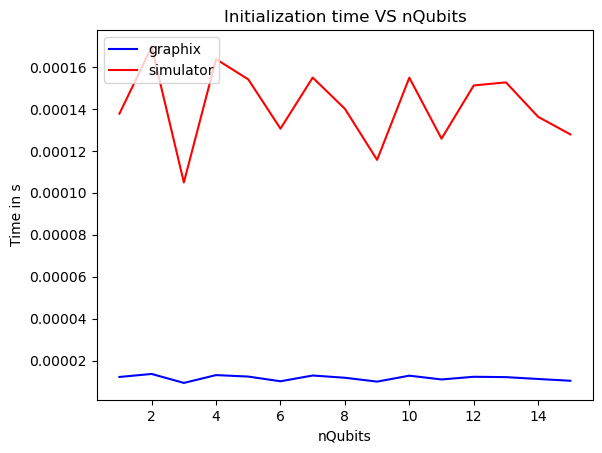

In [4]:
init_times = []
nQubits = 15

for n in range(1, nQubits + 1):    
    circ = build_random_circuit(n, depth)
    p = circ.standardize_and_transpile()
    bench = BenchmarkSimu(p)
    init_times.append(bench.bench_init_times(it=10000))

x = list(range(1, nQubits + 1))
init_times_graphix = [init_times[i]['graphix'] for i in range(len(init_times))]
init_times_simu = [init_times[i]['simu'] for i in range(len(init_times))]

plt.plot(x, init_times_graphix, '-b', label='graphix')
plt.plot(x, init_times_simu, '-r', label='simulator')
plt.xlabel('nQubits')
plt.ylabel('Time in s')
plt.legend(loc='upper left')
plt.title('Initialization time VS nQubits')
plt.show()

output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]


output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node index = [2]
output nodes = [2]
node inde

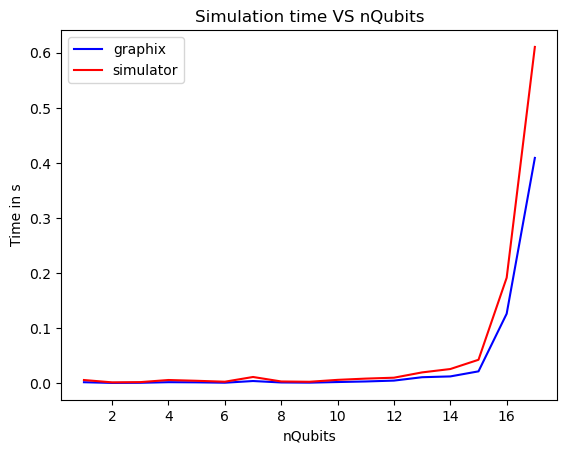

In [3]:
simu_times = []
nQubits = 17

for n in range(1, nQubits + 1):    
    circ = build_random_circuit(n, depth)
    p = circ.standardize_and_transpile()
    p.shift_signals()
    p.minimize_space()
    bench = BenchmarkSimu(p)
    simu_times.append(bench.bench_mbqc_simu(it=100))

x = list(range(1, nQubits + 1))
graphix_simu_times = [simu_times[i]['graphix_simu'] for i in range(len(simu_times))]
simu_times = [simu_times[i]['sv_simu'] for i in range(len(simu_times))]

plt.plot(x, graphix_simu_times, '-b', label='graphix')
plt.plot(x, simu_times, '-r', label='simulator')
plt.legend(loc='upper left')
plt.xlabel('nQubits')
plt.ylabel('Time in s')
plt.title('Simulation time VS nQubits')
plt.show()

In [4]:
cmd_times = []
nQubits = 10

for n in range(1, nQubits + 1):    
    circ = build_random_circuit(n, depth)
    p = circ.standardize_and_transpile()
    print(f'Benchmarking MBQC with {n} input qubits')
    bench = BenchmarkSimu(p)
    cmd_times.append(bench.bench_cmd_times(it=100))
    """
    try:
        cmd_times.append(bench.bench_cmd_times(it=100))
    except Exception as e:
        print(e)
        print(list(p))
        cmd_times.append(cmd_times[-1])
    """
x = list(range(1, nQubits + 1))
labels = ['N', 'M', 'E', 'X', 'Z']
colors = ['b', 'g', 'r', 'c', 'm']
graphix_cmd_times = [
    [cmd['N']['graphix'] for cmd in cmd_times],
    [cmd['M']['graphix'] for cmd in cmd_times],
    [cmd['E']['graphix'] for cmd in cmd_times],
    [cmd['X']['graphix'] for cmd in cmd_times],
    [cmd['Z']['graphix'] for cmd in cmd_times]
]
sv_simu_cmd_times = [
    [cmd['N']['simu'] for cmd in cmd_times],
    [cmd['M']['simu'] for cmd in cmd_times],
    [cmd['E']['simu'] for cmd in cmd_times],
    [cmd['X']['simu'] for cmd in cmd_times],
    [cmd['Z']['simu'] for cmd in cmd_times]
]

plt.plot(x, graphix_cmd_times[0], f'-b', label=f'N-graphix')
plt.plot(x, sv_simu_cmd_times[0], f'-b', label=f'N-simu')

plt.plot(x, graphix_cmd_times[1], f'-r', label=f'M-graphix')
plt.plot(x, sv_simu_cmd_times[1], f'-r', label=f'M-simu')

plt.plot(x, graphix_cmd_times[2], f'-g', label=f'E-graphix')
plt.plot(x, graphix_cmd_times[2], f'-g', label=f'E-simu')

plt.plot(x, graphix_cmd_times[3], f'-y', label=f'X-graphix')
plt.plot(x, sv_simu_cmd_times[3], f'-y', label=f'X-simu')

plt.plot(x, graphix_cmd_times[4], f'-c', label=f'Z-graphix')
plt.plot(x, sv_simu_cmd_times[4], f'-c', label=f'Z-simu')

plt.legend(loc='upper left')
plt.xlabel('nQubits')
plt.ylabel('Time in s')
plt.title('Simulation time VS nQubits')
plt.show()

Benchmarking MBQC with 1 input qubits
[['N', 1], ['N', 2], ['N', 3], ['N', 4], ['E', (3, 4)], ['E', (2, 3)], ['E', (1, 2)], ['E', (0, 1)], ['M', 0, 'XY', 0.5, [], []], ['M', 1, 'XY', -0.6284438016618008, [0], []], ['M', 2, 'XY', -0.5, [0], []], ['M', 3, 'XY', 0, [], []], ['Z', 4, [1, 2]], ['X', 4, [1, 3]]]
[0]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4]
Node index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4]
Node index: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4]
Node index:

IndexError: list index out of range